### #1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score


### #2 Importing the datasets

In [2]:
# loading the datasets and combining them into one dataframe
all_files = glob.glob("../data/HP_Cool_*.csv")

print(f"Found {len(all_files)} datasets")

df_list = []

for filename in all_files:
    temp_df = pd.read_csv(filename)
    temp_df['source_file'] = filename

    df_list.append(temp_df)


df = pd.concat(df_list, ignore_index=True)

print("Combined dataset shape:", df.shape)
print(f"Total Samples: {len(df)}")

Found 8 datasets
Combined dataset shape: (180444, 15)
Total Samples: 180444


### #3 Looking through the data

In [3]:
# checking the first 15 rows of the combined dataframe
df.head(15)

,TimeStamp,T_Return (C),T_Return_SP (C),T_Supply (C),T_Outdoor (C),T_Outdoor_SP (C),T_Indoor (C),T_Indoor_SP (C),Outdoor Unit Power (W),Indoor Unit Power (W),Evaporator Airflow Rate (CFM),Cooling Capacity (kW),T_SP_Thermostat (C),T_Indoor_Thermostat (C),source_file
0,2024-03-11 11:13:59,22.8468,22.2774,23.5009,40.5309,40.5076,22.0341,22.2807,-0.112150,487.896,1712.97,0.0,20.0,24.559259,../data\HP_Cool_OAT105F_SP68F.csv
1,2024-03-11 11:14:00,22.8490,22.2840,23.5174,40.5060,40.5043,22.0154,22.2840,0.216172,485.926,1713.63,0.0,20.0,24.555556,../data\HP_Cool_OAT105F_SP68F.csv
2,2024-03-11 11:14:01,22.8535,22.2840,23.5200,40.5132,40.5109,21.9924,22.2840,0.544495,488.881,1714.45,0.0,20.0,24.550741,../data\HP_Cool_OAT105F_SP68F.csv
3,2024-03-11 11:14:02,22.8377,22.2873,23.5030,40.5121,40.5043,21.9794,22.2840,-0.768796,490.851,1714.45,0.0,20.0,24.545926,../data\HP_Cool_OAT105F_SP68F.csv
4,2024-03-11 11:14:03,22.8428,22.2873,23.4976,40.5060,40.5043,21.9573,22.2840,1.201140,494.791,1721.83,0.0,20.0,24.541111,../data\HP_Cool_OAT105F_SP68F.csv
5,2024-03-11 11:14:04,22.8516,22.2873,23.5117,40.5130,40.5076,21.9438,22.2774,-1.097120,490.851,1713.46,0.0,20.0,24.536296,../data\HP_Cool_OAT105F_SP68F.csv
6,2024-03-11 11:14:05,22.8463,22.2807,23.5114,40.5120,40.5011,21.9376,22.2873,0.216172,503.655,1712.48,0.0,20.0,24.531481,../data\HP_Cool_OAT105F_SP68F.csv
7,2024-03-11 11:14:06,22.8430,22.2840,23.5127,40.4946,40.5109,21.9196,22.2774,-0.768796,493.806,1711.98,0.0,20.0,24.526667,../data\HP_Cool_OAT105F_SP68F.csv
8,2024-03-11 11:14:07,22.8396,22.2807,23.5054,40.5052,40.5109,21.9187,22.2873,-0.112150,494.791,1711.16,0.0,20.0,24.521852,../data\HP_Cool_OAT105F_SP68F.csv
9,2024-03-11 11:14:08,22.8403,22.2873,23.5047,40.4960,40.5043,21.9041,22.2873,-1.753760,488.881,1710.34,0.0,20.0,24.517037,../data\HP_Cool_OAT105F_SP68F.csv


In [4]:
# checking the summary statistics
df.describe()

,T_Return (C),T_Return_SP (C),T_Supply (C),T_Outdoor (C),T_Outdoor_SP (C),T_Indoor (C),T_Indoor_SP (C),Outdoor Unit Power (W),Indoor Unit Power (W),Evaporator Airflow Rate (CFM),Cooling Capacity (kW),T_SP_Thermostat (C),T_Indoor_Thermostat (C)
count,180444.000000,180444.000000,180444.000000,180444.000000,180444.000000,180444.000000,180444.000000,180444.000000,180444.000000,180444.000000,180444.000000,180444.000000,180444.000000
mean,22.491677,22.484502,15.550498,37.791964,37.826642,22.339428,22.482187,1853.765936,366.509056,1445.166920,5.840918,20.328597,20.878829
std,1.847632,1.848000,5.436773,7.851401,7.849730,1.800325,1.846730,1393.734167,178.974645,404.162142,4.363838,5.674303,5.807558
min,18.588700,19.140500,7.858550,21.680800,23.834400,18.825600,19.140500,-34.257700,17.080900,789.068000,-0.636761,0.000000,0.000000
25%,20.856300,20.802600,11.226775,29.439000,29.402000,20.695900,20.802600,0.216172,107.698000,868.030000,0.000000,20.000000,20.555556
50%,22.454600,22.418700,13.256300,40.426750,40.504300,22.275350,22.415400,2249.880000,486.911000,1711.980000,8.383567,22.222222,22.243519
75%,24.162100,24.166200,20.963700,46.067900,46.104800,23.954025,24.162900,3231.570000,490.851000,1725.770000,9.231372,22.222222,23.611111
max,27.509700,26.908900,27.441500,47.022700,46.173800,26.599600,26.869500,10761.700000,569.648000,1816.390000,11.334328,24.444444,26.222222


### #4 Cleaning and performing feature engineering

In [5]:
# checking for missing values
df.isna().sum()

TimeStamp                        0
T_Return (C)                     0
T_Return_SP (C)                  0
T_Supply (C)                     0
T_Outdoor (C)                    0
T_Outdoor_SP (C)                 0
T_Indoor (C)                     0
T_Indoor_SP (C)                  0
Outdoor Unit Power (W)           0
Indoor Unit Power (W)            0
Evaporator Airflow Rate (CFM)    0
Cooling Capacity (kW)            0
T_SP_Thermostat (C)              0
T_Indoor_Thermostat (C)          0
source_file                      0
dtype: int64

In [6]:
# creating the target variable: total power consumption
df['Total_Power_W'] = df['Outdoor Unit Power (W)'] + df['Indoor Unit Power (W)']

# creating the column for temperature difference between outdoor and indoor
df['Delta_T'] = df['T_Outdoor (C)'] - df['T_Indoor (C)']


# creating a column to represent the temperature difference across the coil
df['Coil_Delta'] = df['T_Return (C)'] - df['T_Supply (C)']

In [7]:
# parsing the TimeStamp column
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
df['Hour'] = df['TimeStamp'].dt.hour

In [8]:
# 1. removing the idle states and leaving data having power > 200W
df = df[df['Total_Power_W'] > 200]

In [9]:
print(f"Cleaned shape:  {df.shape}")

Cleaned shape:  (122956, 19)


### #5 Exploring the data

In [10]:
# setting the seaborn theme for plots
sns.set_theme(style="whitegrid")

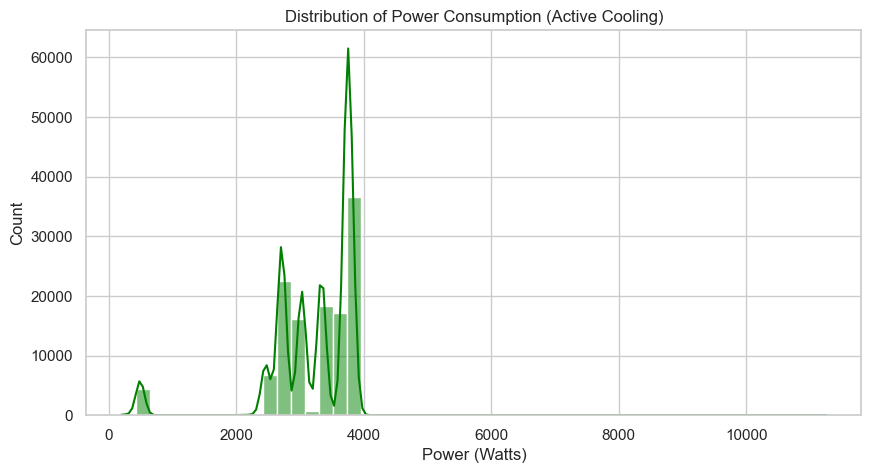

In [11]:
# plotting the power distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Total_Power_W'], bins=50, kde=True, color='green')
plt.title("Distribution of Power Consumption (Active Cooling)")
plt.xlabel("Power (Watts)")
plt.savefig('../eda_results/eda_1_power_distribution.png')
plt.show()

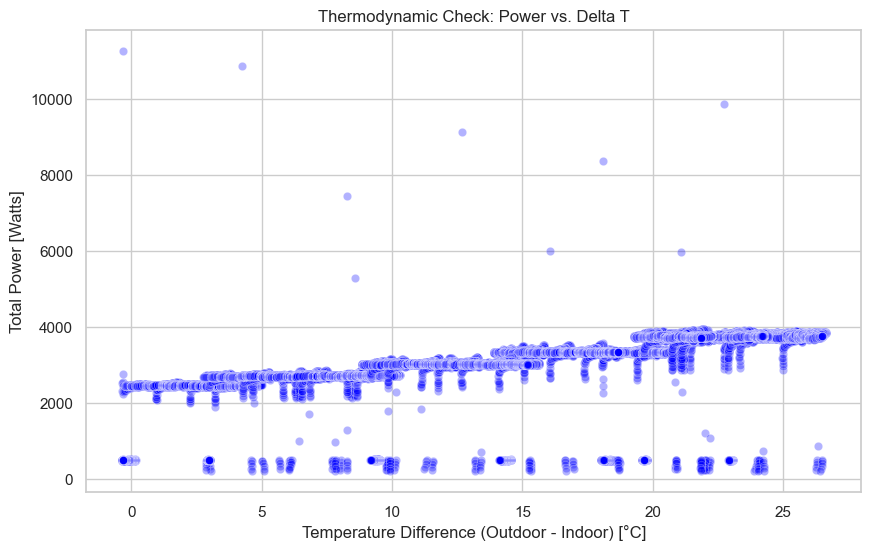

In [12]:
# plotting the scatter plot of power vs temperature difference
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Delta_T'], y=df['Total_Power_W'], alpha=0.3, color='blue')
plt.title("Thermodynamic Check: Power vs. Delta T")
plt.xlabel("Temperature Difference (Outdoor - Indoor) [°C]")
plt.ylabel("Total Power [Watts]")
plt.savefig('../eda_results/eda_2_power_vs_deltaT.png')
plt.show()

In [13]:
# removing outliers based on power consumption
df = df[df['Total_Power_W'] < 5000]

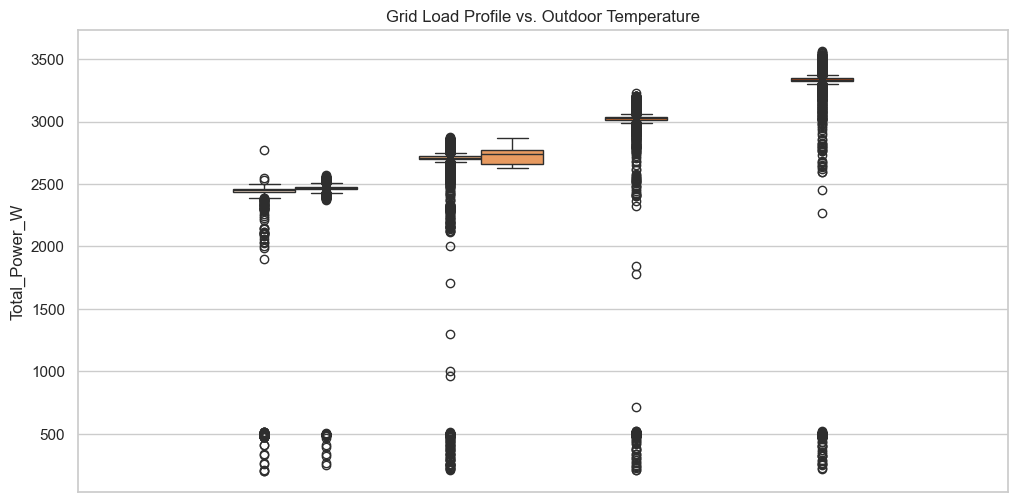

In [14]:
# plotting the box plot of power vs outdoor temperature ranges
df['Temp_Bin'] = pd.cut(df['T_Outdoor (C)'], bins=range(20, 45, 2))
plt.figure(figsize=(12, 6))
sns.boxplot(hue='Temp_Bin', y='Total_Power_W', data=df, palette="Oranges", legend=False)
plt.title("Grid Load Profile vs. Outdoor Temperature")
plt.xticks(rotation=45)
plt.savefig('../eda_results/eda_3_load_profile.png')
plt.show()

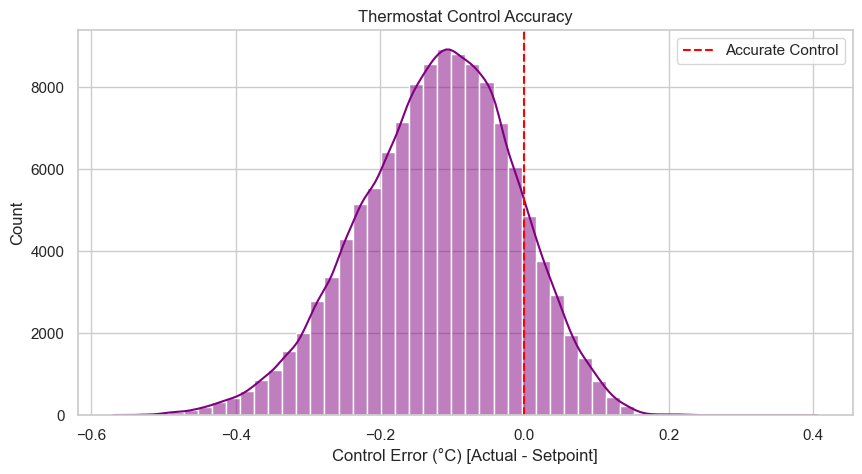

In [15]:
# plotting the thermostat control accuracy
df['Control_Error'] = df['T_Indoor (C)'] - df['T_Indoor_SP (C)']
plt.figure(figsize=(10, 5))
sns.histplot(df['Control_Error'], bins=50, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--', label="Accurate Control")
plt.title("Thermostat Control Accuracy")
plt.xlabel("Control Error (°C) [Actual - Setpoint]")
plt.legend()
plt.savefig('../eda_results/eda_4_control_error.png')
plt.show()

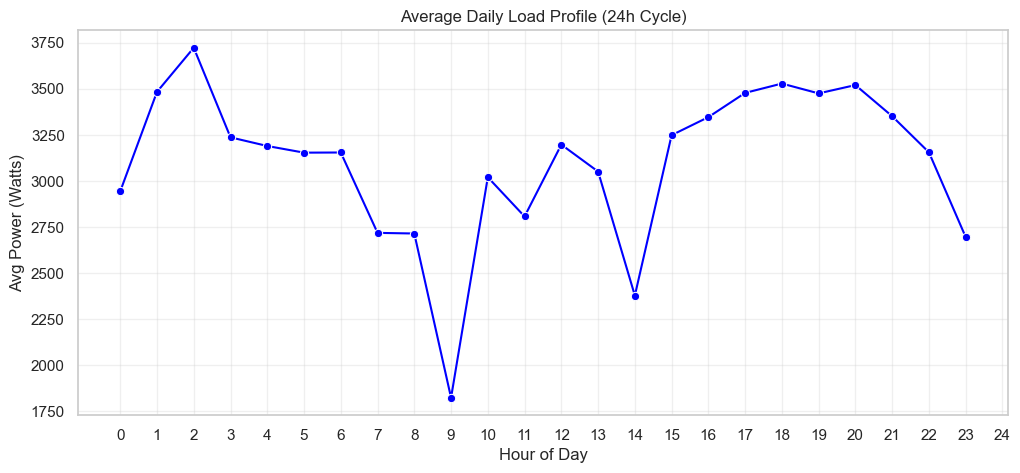

In [16]:
# plotting the average daily load profile (24h cycle)
hourly_profile = df.groupby('Hour')['Total_Power_W'].mean()
plt.figure(figsize=(12, 5))
sns.lineplot(x=hourly_profile.index, y=hourly_profile.values, marker="o", color="blue")
plt.title("Average Daily Load Profile (24h Cycle)")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Power (Watts)")
plt.xticks(range(0, 25))
plt.grid(True, alpha=0.3)
plt.savefig('../eda_results/eda_5_hourly_profile.png')
plt.show()


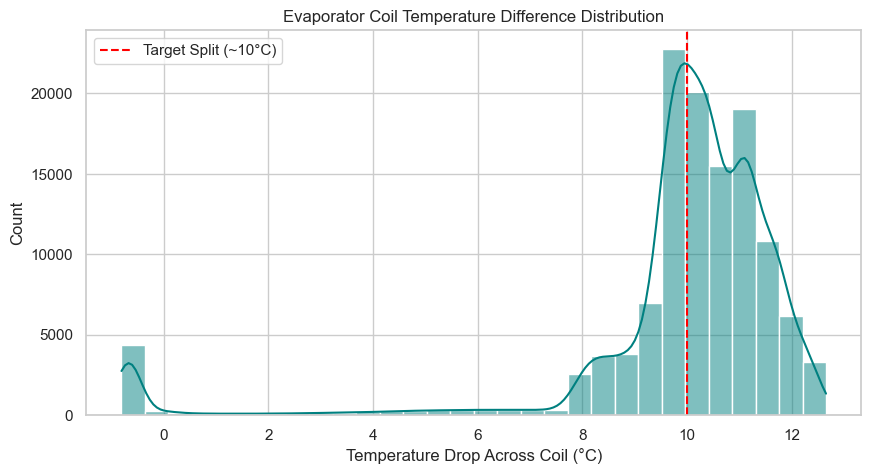

In [17]:
# plotting the coil temperature distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Coil_Delta'], bins=30, kde=True, color='teal')
plt.axvline(10, color='red', linestyle='--', label="Target Split (~10°C)")
plt.title("Evaporator Coil Temperature Difference Distribution")
plt.xlabel("Temperature Drop Across Coil (°C)")
plt.legend()
plt.savefig('../eda_results/eda_6_coil_temp_diff.png')
plt.show()

### #6 Preprocessing the data

In [18]:
# specifying the features and target columns
feature_cols = ['T_Outdoor (C)', 'T_Indoor (C)', 'Delta_T']
target_col = 'Total_Power_W'

X = df[feature_cols]
y = df[target_col]

In [19]:
# scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples:  {X_test.shape[0]}")

Training samples: 98357
Testing samples:  24590


### #7 Model training and evaluation

In [21]:
# training and evaluating the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)
print(f"1. Linear Regression MAE: ±{lr_mae:.2f} Watts")
print(f"   Linear Regression R²: {lr_r2:.2f}")

1. Linear Regression MAE: ±210.54 Watts
   Linear Regression R²: 0.55


In [22]:
# training and evaluating the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)
print(f"2. XGBoost MAE: ±{xgb_mae:.2f} Watts")
print(f"   XGBoost R²: {xgb_r2:.2f}")

2. XGBoost MAE: ±56.21 Watts
   XGBoost R²: 0.89


In [23]:
# comparing the models
improvement = lr_mae - xgb_mae

print(f"Accuracy Improvement from Linear Regression to XGBoost: {improvement:.2f} Watts per prediction")

Accuracy Improvement from Linear Regression to XGBoost: 154.33 Watts per prediction


### #8 Saving Model and Scaler

In [24]:
# saving the scaler and best model
MODEL_FILE = "../model_and_scaler/optimizer_model.pkl"
SCALER_FILE = "../model_and_scaler/feature_scaler.pkl"

joblib.dump(scaler, SCALER_FILE)
joblib.dump(xgb_model, MODEL_FILE)

print(f"Scaler saved to: {SCALER_FILE}")
print(f"Model saved to: {MODEL_FILE}")

Scaler saved to: ../model_and_scaler/feature_scaler.pkl
Model saved to: ../model_and_scaler/optimizer_model.pkl


### #9 Simulating the model for Outdoor temperatures of 34 and 31 deg C

In [25]:

# specifying the setpoints (Celsius) as per NREL specification
SP_BASELINE  = 22.22
SP_LOAD_SHED = 24.44

# specifying the outdoor temperature for the simulation
outdoor_temp = 34.0  # degrees Celsius

# defining function for model prediction
def simulate_power(indoor_temp):
    # setting the raw input for the specific scenario
    raw = pd.DataFrame({
        'T_Outdoor (C)': [outdoor_temp],
        'T_Indoor (C)': [indoor_temp],
        'Delta_T': [outdoor_temp - indoor_temp]
    })
    # scaling the raw input and returning prediction
    scaled = scaler.transform(raw)
    return xgb_model.predict(scaled)[0]

# getting the model predictions for baseline and load-shed scenarios
p_base = simulate_power(SP_BASELINE)
p_shed = simulate_power(SP_LOAD_SHED)

# caculating power consumption difference relative to baseline)
pwr_diff = p_shed - p_base

# aggregating the power consumption difference for 1,000 Units (Virtual Power Plant Capacity in MW)
N_UNITS = 1000
impact_shed_mw = (pwr_diff * N_UNITS) / 1000000


# printing the results table
print("\n" + "="*95)
print(f"RESULTS: Demand-Side Management Impact Assessment @ {outdoor_temp}°C Outdoor Temp")
print("="*95)
print(f"{'SCENARIO':<15} | {'SETPOINT':<10} | {'POWER (W)':<12} | {'GRID IMPACT (MW) - 1000 UNITS':<18} ")
print("-" * 95)
print(f"{'1. BASELINE':<15} | {SP_BASELINE:.1f}°C     | {p_base:.0f} W       | {'0.000 MW':<18} ")
print(f"{'2. LOAD SHED':<15} | {SP_LOAD_SHED:.1f}°C     | {p_shed:.0f} W       | {impact_shed_mw:+.3f} MW        ")
print("="*95)

# calculating the grid flexibility percentage
flex_down_pct = (pwr_diff / p_base) * 100

print(f"Demand-Side Management SUMMARY:")
print(f"Load-Shed Capacity: {flex_down_pct:+.2f}% shift in demand potential.")

# adding a note section to explain the results
print("\n" + "-"*30)
if flex_down_pct > 0:
    print(f"* NOTE: The positive shift (+{flex_down_pct:.2f}%) at {outdoor_temp}°C indicates 'Saturation'.")
    print("  Raising the setpoint fails to reduce power because the compressor is already")
    print("  operating at its maximum physical limit to combat the high ambient temperature.")
else:
    print(f"* NOTE: The negative shift ({flex_down_pct:.2f}%) indicates successful demand relief on the grid.")
    print("  The individual heat pump units have sufficient capacity to modulate power in response to setpoint changes.")


RESULTS: Demand-Side Management Impact Assessment @ 34.0°C Outdoor Temp
SCENARIO        | SETPOINT   | POWER (W)    | GRID IMPACT (MW) - 1000 UNITS 
-----------------------------------------------------------------------------------------------
1. BASELINE     | 22.2°C     | 2918 W       | 0.000 MW           
2. LOAD SHED    | 24.4°C     | 2951 W       | +0.033 MW        
Demand-Side Management SUMMARY:
Load-Shed Capacity: +1.13% shift in demand potential.

------------------------------
* NOTE: The positive shift (+1.13%) at 34.0°C indicates 'Saturation'.
  Raising the setpoint fails to reduce power because the compressor is already
  operating at its maximum physical limit to combat the high ambient temperature.


In [29]:

# specifying the setpoints (Celsius) as per NREL specification
SP_BASELINE  = 22.22
SP_LOAD_SHED = 24.44

# specifying the outdoor temperature for the simulation
outdoor_temp = 31.0  # degrees Celsius

# defining function for model prediction
def simulate_power(indoor_temp):
    # setting the raw input for the specific scenario
    raw = pd.DataFrame({
        'T_Outdoor (C)': [outdoor_temp],
        'T_Indoor (C)': [indoor_temp],
        'Delta_T': [outdoor_temp - indoor_temp]
    })
    # scaling the raw input and returning prediction
    scaled = scaler.transform(raw)
    return xgb_model.predict(scaled)[0]

# getting the model predictions for baseline and load-shed scenarios
p_base = simulate_power(SP_BASELINE)
p_shed = simulate_power(SP_LOAD_SHED)

# caculating power consumption difference relative to baseline)
pwr_diff = p_shed - p_base

# aggregating the power consumption difference for 1,000 Units (Virtual Power Plant Capacity in MW)
N_UNITS = 1000
impact_shed_mw = (pwr_diff * N_UNITS) / 1000000


# printing the results table
print("\n" + "="*95)
print(f"RESULTS: Demand-Side Management Impact Assessment @ {outdoor_temp}°C Outdoor Temp")
print("="*95)
print(f"{'SCENARIO':<15} | {'SETPOINT':<10} | {'POWER (W)':<12} | {'GRID IMPACT (MW) - 1000 UNITS':<18} ")
print("-" * 95)
print(f"{'1. BASELINE':<15} | {SP_BASELINE:.1f}°C     | {p_base:.0f} W       | {'0.000 MW':<18} ")
print(f"{'2. LOAD SHED':<15} | {SP_LOAD_SHED:.1f}°C     | {p_shed:.0f} W       | {impact_shed_mw:+.3f} MW        ")
print("="*95)

# calculating the grid flexibility percentage
flex_down_pct = (pwr_diff / p_base) * 100

print(f"Demand-Side Management SUMMARY:")
print(f"Load-Shed Capacity: {flex_down_pct:+.2f}% shift in demand potential.")

# adding a note section to explain the results
print("\n" + "-"*30)
if flex_down_pct > 0:
    print(f"* NOTE: The positive shift (+{flex_down_pct:.2f}%) at {outdoor_temp}°C indicates 'Saturation'.")
    print("  Raising the setpoint fails to reduce power because the compressor is already")
    print("  operating at its maximum physical limit to combat the high ambient heat.")
else:
    print(f"* NOTE: The negative shift ({flex_down_pct:.2f}%) indicates successful demand relief on the grid.")
    print("  The individual heat pump units have sufficient capacity to modulate power in response to setpoint changes.")


RESULTS: Demand-Side Management Impact Assessment @ 31.0°C Outdoor Temp
SCENARIO        | SETPOINT   | POWER (W)    | GRID IMPACT (MW) - 1000 UNITS 
-----------------------------------------------------------------------------------------------
1. BASELINE     | 22.2°C     | 2889 W       | 0.000 MW           
2. LOAD SHED    | 24.4°C     | 2794 W       | -0.095 MW        
Demand-Side Management SUMMARY:
Load-Shed Capacity: -3.29% shift in demand potential.

------------------------------
* NOTE: The negative shift (-3.29%) indicates successful demand relief on the grid.
  The individual heat pump units have sufficient capacity to modulate power in response to setpoint changes.
